In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [33]:
startup=pd.read_csv("D:\CSV FIles Path\Assignments\MLR\Startup50.csv")
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [34]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [35]:
startup['State']=startup['State'].astype("category")

In [36]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [37]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   R&D Spend        50 non-null     float64 
 1   Administration   50 non-null     float64 
 2   Marketing Spend  50 non-null     float64 
 3   State            50 non-null     category
 4   Profit           50 non-null     float64 
dtypes: category(1), float64(4)
memory usage: 1.9 KB


## Correlation between the Dependent and the Independent Variables

In [38]:
startup.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [39]:
# Checking for any missing value
startup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

### Scatterplot between variables along with histograms

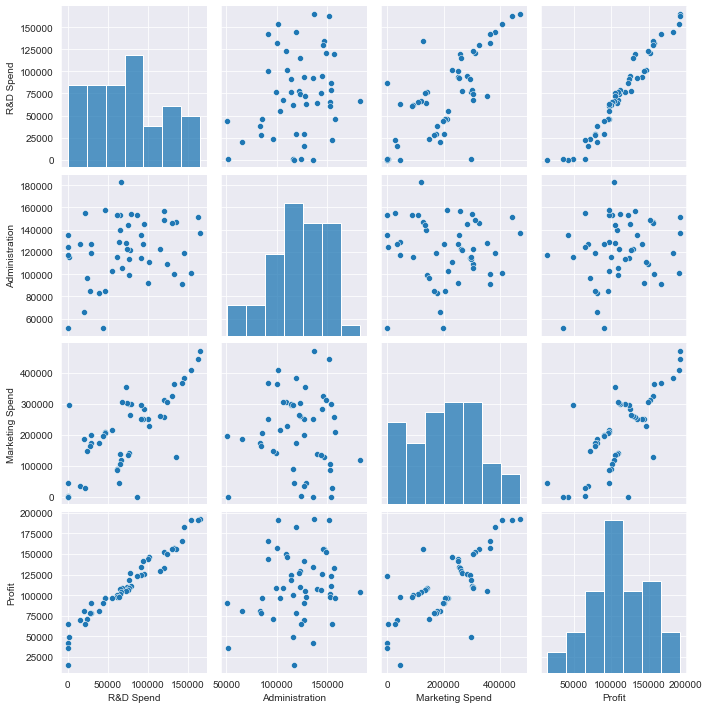

In [40]:
sns.set_style(style='darkgrid')
sns.pairplot(startup)

## Outliers Check

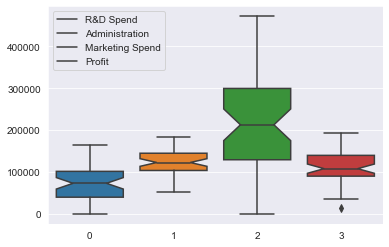

In [41]:
sns.boxplot(data=[startup['R&D Spend'],startup['Administration'],startup['Marketing Spend'],startup['Profit']],notch=True)
plt.legend(['R&D Spend','Administration','Marketing Spend','Profit'])

In [266]:
# Renaming few columns
startup=startup.rename({'R&D':'Research','Marketing Spend':'Marketing'}, axis=1)
startup.head()

,Research,Administration,Marketing,State,Profit,Predicted,Errors
0,165349.20,136897.80,471784.10,New York,192261.83,192521.252890,-259.422890
1,162597.70,151377.59,443898.53,California,191792.06,189156.768232,2635.291768
2,153441.51,101145.55,407934.54,Florida,191050.39,182147.279096,8903.110904
3,144372.41,118671.85,383199.62,New York,182901.99,173696.700026,9205.289974
4,142107.34,91391.77,366168.42,Florida,166187.94,172139.514183,-5951.574183


## Build Regression MODEL 1 for all independent variables

In [112]:
# Profit is the Dependent Variable.
import statsmodels.formula.api as smf
Model1 = smf.ols('Profit~Research+Administration+Marketing',data=startup).fit()

In [113]:
Model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 17 Dec 2021   Prob (F-statistic):           4.53e-30
Time:                        10:08:41   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
Research           0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing          0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Build Regression Model for Dependent VS Each Independent Features.

In [157]:
# Check the P VALUE Significance for each Independent Features
model_admin = smf.ols('Profit~Administration',data=startup).fit()

In [158]:
model_admin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Fri, 17 Dec 2021   Prob (F-statistic):              0.162
Time:                        11:07:54   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [160]:
model_mart = smf.ols('Profit~Marketing',data=startup).fit()

In [161]:
model_mart.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Fri, 17 Dec 2021   Prob (F-statistic):           4.38e-10
Time:                        11:09:53   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing      0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
Model1.fittedvalues

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


In [116]:
startup.head()

,Research,Administration,Marketing,State,Profit,Predicted,Errors
0,165349.20,136897.80,471784.10,New York,192261.83,192261.83,8.731149e-11
1,162597.70,151377.59,443898.53,California,191792.06,191792.06,8.731149e-11
2,153441.51,101145.55,407934.54,Florida,191050.39,191050.39,8.731149e-11
3,144372.41,118671.85,383199.62,New York,182901.99,182901.99,5.820766e-11
4,142107.34,91391.77,366168.42,Florida,166187.94,166187.94,5.820766e-11


In [162]:
#Beta Coefficients
Model1.params

Intercept         50122.192990
Research              0.805715
Administration       -0.026816
Marketing             0.027228
dtype: float64

In [163]:
# Find the P value to identify the collinearity
print(Model1.tvalues,'\n',Model1.pvalues)

Intercept          7.626218
Research          17.846374
Administration    -0.525507
Marketing          1.655077
dtype: float64 
 Intercept         1.057379e-09
Research          2.634968e-22
Administration    6.017551e-01
Marketing         1.047168e-01
dtype: float64


In [165]:
## Check the accuracy of the Model1, by finding the R square Value
(Model1.rsquared,Model1.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

## Build VIF for each Independent Variable.

In [120]:
rsq_Research = smf.ols('Research~Administration+Marketing',data=startup).fit().rsquared  
vif_Research = 1/(1-rsq_Research)

In [121]:
rsq_Administration = smf.ols('Administration~Research+Marketing',data=startup).fit().rsquared  
vif_Administration = 1/(1-rsq_Administration)

In [122]:
rsq_Marketing = smf.ols('Marketing~Research+Administration',data=startup).fit().rsquared  
vif_Marketing = 1/(1-rsq_Marketing)

In [123]:
# Storing VIF values in a data frame by placing them in a dictionary
vif_df = {'Variables':['Research','Administration','Marketing'],'VIF':[vif_Research,vif_Administration,vif_Marketing]}
Vif_frame = pd.DataFrame(vif_df)  
Vif_frame

,Variables,VIF
0,Research,2.468903
1,Administration,1.175091
2,Marketing,2.326773


In [124]:
# Calculate Predicted Value and Residual Value
startup['Predicted']=Model1.fittedvalues
startup['Errors']=Model1.resid
startup.head()

,Research,Administration,Marketing,State,Profit,Predicted,Errors
0,165349.20,136897.80,471784.10,New York,192261.83,192521.252890,-259.422890
1,162597.70,151377.59,443898.53,California,191792.06,189156.768232,2635.291768
2,153441.51,101145.55,407934.54,Florida,191050.39,182147.279096,8903.110904
3,144372.41,118671.85,383199.62,New York,182901.99,173696.700026,9205.289974
4,142107.34,91391.77,366168.42,Florida,166187.94,172139.514183,-5951.574183


## Residual Analysis
## Test for Normality of residuals(errors) Q-Q Plot 

In [125]:
Model1.resid

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

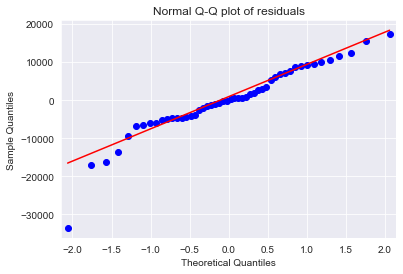

In [126]:
#Q-Q Plotting of Residuals
import statsmodels.api as sm
qqplot=sm.qqplot(Model1.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [168]:
list(np.where(Model1.resid>10000))

[array([10, 12, 16, 36, 38, 45], dtype=int64)]

## Residual Visualisation

C:\Users\Danny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Errors'>

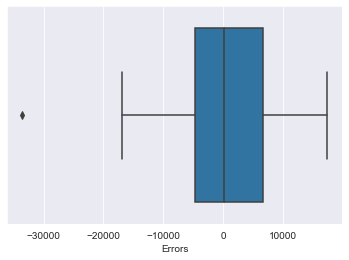

In [169]:
sns.boxplot(startup['Errors'])

<AxesSubplot:xlabel='Errors', ylabel='Count'>

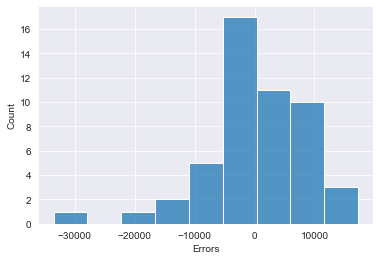

In [170]:
sns.histplot(startup["Errors"])

C:\Users\Danny\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Errors', ylabel='Density'>

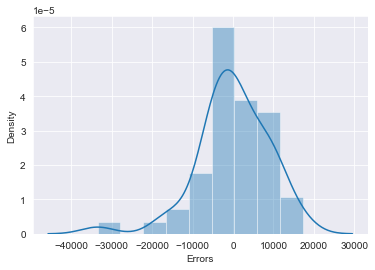

In [171]:
sns.distplot(startup['Errors'])

## Residual Plot for Homoscedasticity

In [172]:
# Normalising the errors
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

### Check for any pattern in RESIDUAL VS PREDICTED VALUES

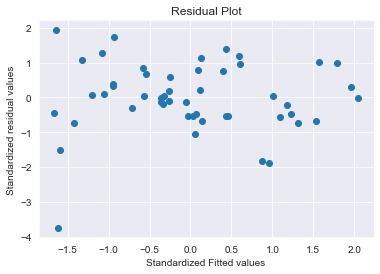

In [173]:
plt.scatter(get_standardized_values(Model1.fittedvalues),
            get_standardized_values(Model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()


## Residual Vs Regressors

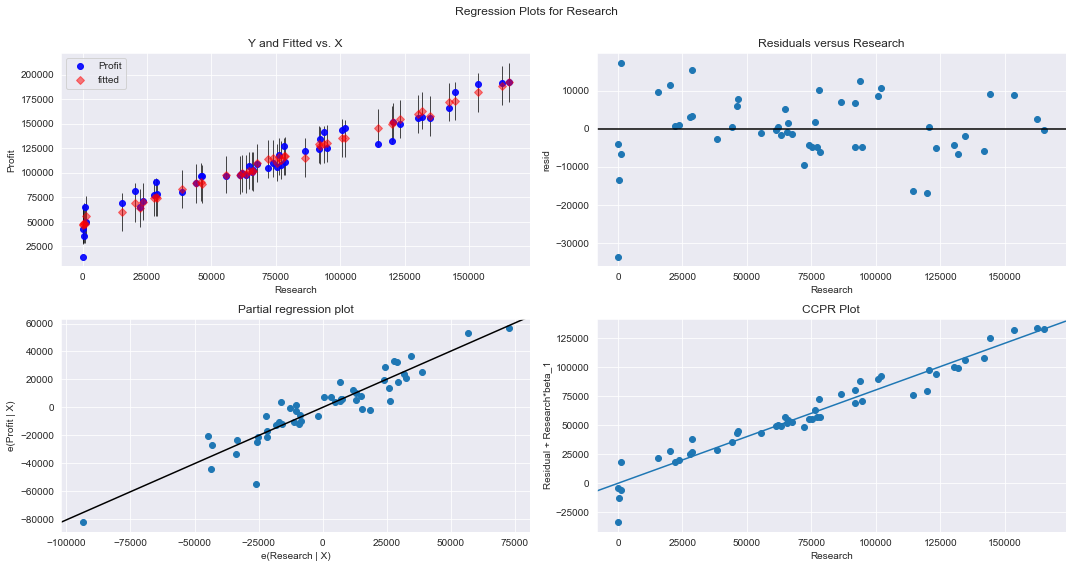

In [174]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(Model1, "Research", fig=fig)
plt.show()

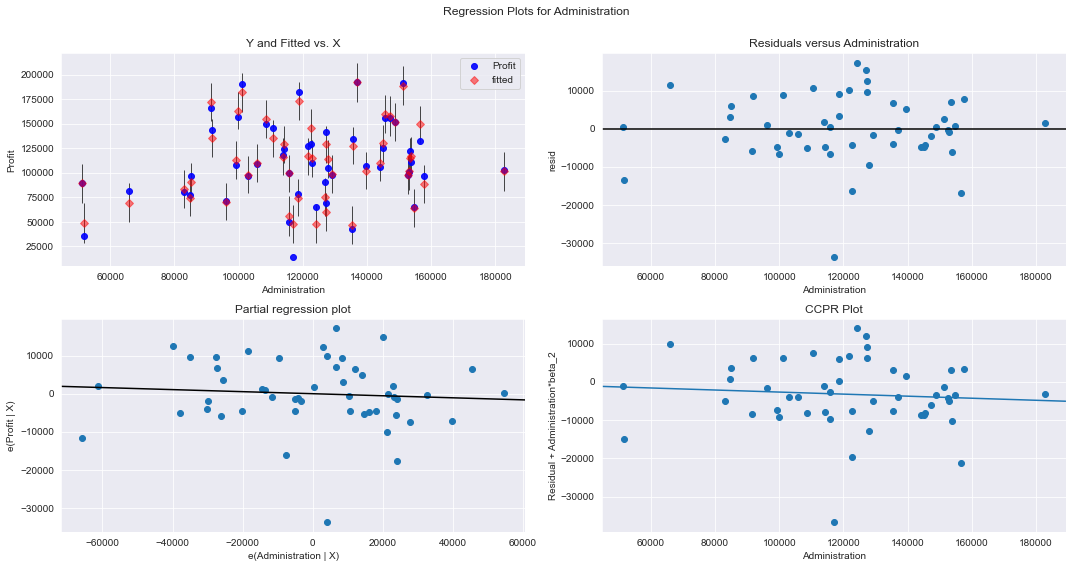

In [175]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(Model1, "Administration", fig=fig)
plt.show()

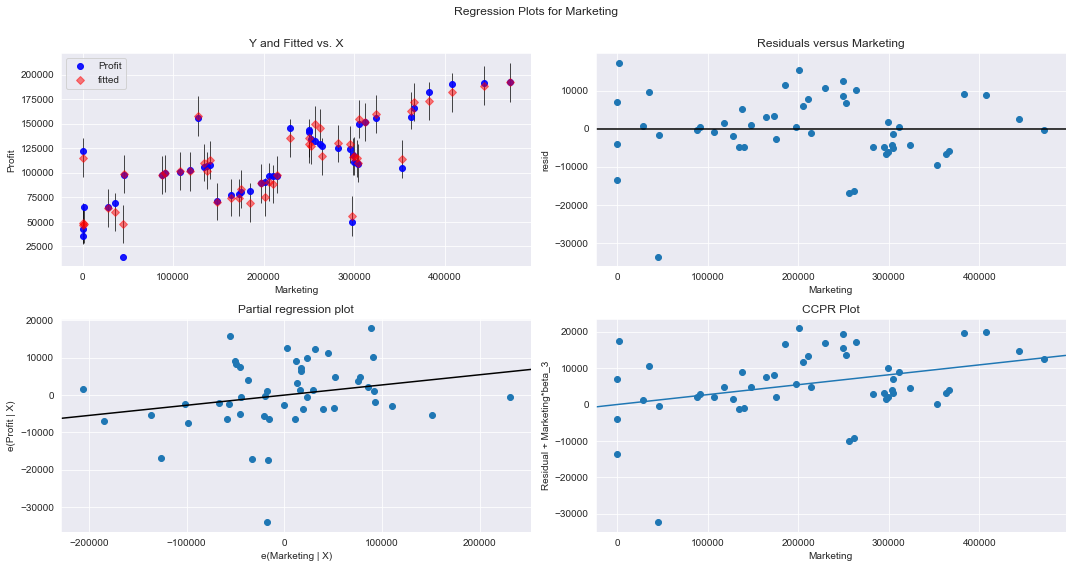

In [176]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(Model1, "Marketing", fig=fig)
plt.show()

## Detecting Influencers/Outliers

## Cook's Distance

In [177]:
# Check the most influencial point in the dataset

In [178]:
Model1_influence = Model1.get_influence()
(c, _) = Model1_influence.cooks_distance

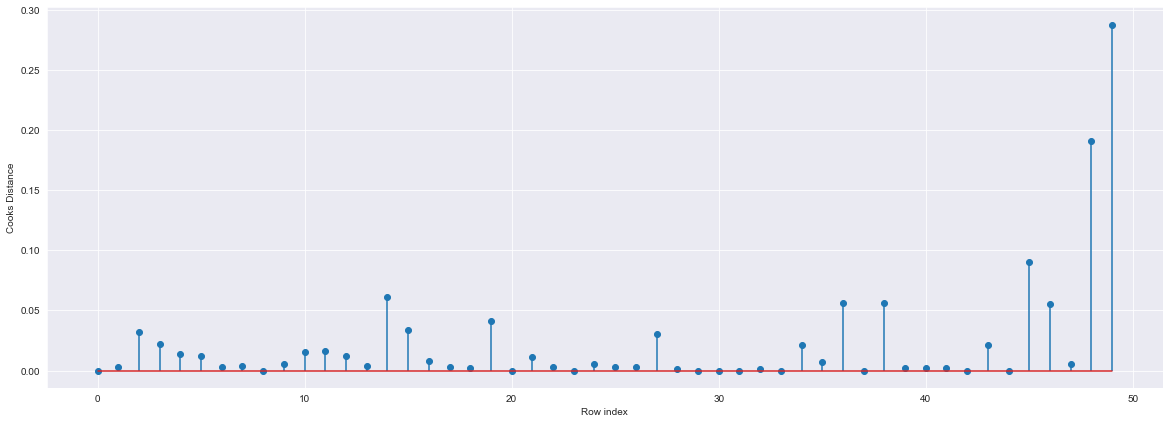

In [179]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [180]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543263)

## Check the High Influence points

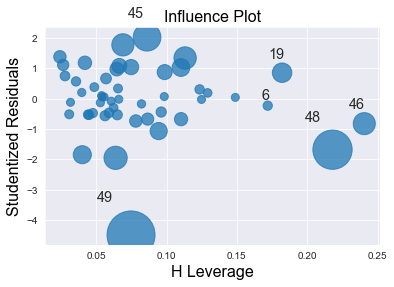

In [181]:
# Plot the leverage VS Residuals
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(Model1)
plt.show()

In [182]:
startup.shape

(50, 7)

## COOK Distance Formula

In [183]:
k = startup.shape[1]
n = startup.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.48

#### From the above plot, it is evident that data point 49 is the influencers

In [190]:
startup[startup.index.isin([49])]

,Research,Administration,Marketing,State,Profit,Predicted,Errors
49,0.0,116983.8,45173.06,California,14681.4,48215.134111,-33533.734111


In [186]:
startup.head()

,Research,Administration,Marketing,State,Profit,Predicted,Errors
0,165349.20,136897.80,471784.10,New York,192261.83,192521.252890,-259.422890
1,162597.70,151377.59,443898.53,California,191792.06,189156.768232,2635.291768
2,153441.51,101145.55,407934.54,Florida,191050.39,182147.279096,8903.110904
3,144372.41,118671.85,383199.62,New York,182901.99,173696.700026,9205.289974
4,142107.34,91391.77,366168.42,Florida,166187.94,172139.514183,-5951.574183


In [191]:
Model1.aic

1058.7714985998055

## Improving the Model

In [ ]:
#Load the data
startup_new = pd.read_csv("D:\CSV FIles Path\Assignments\MLR\Startup50.csv")

In [215]:
#Discard the data points which are influencers and reasign the row number (reset_index())
startup1=startup.drop(startup.index[[49]],axis=0).reset_index()

In [216]:
startup1

,index,Research,Administration,Marketing,State,Profit,Predicted,Errors
0,0,165349.20,136897.80,471784.10,New York,192261.83,192521.252890,-259.422890
1,1,162597.70,151377.59,443898.53,California,191792.06,189156.768232,2635.291768
2,2,153441.51,101145.55,407934.54,Florida,191050.39,182147.279096,8903.110904
3,3,144372.41,118671.85,383199.62,New York,182901.99,173696.700026,9205.289974
4,4,142107.34,91391.77,366168.42,Florida,166187.94,172139.514183,-5951.574183
5,5,131876.90,99814.71,362861.36,New York,156991.12,163580.780571,-6589.660571
6,6,134615.46,147198.87,127716.82,California,156122.51,158114.096669,-1991.586669
7,7,130298.13,145530.06,323876.68,Florida,155752.60,160021.363048,-4268.763048
8,8,120542.52,148718.95,311613.29,New York,152211.77,151741.699699,470.070301
9,9,123334.88,108679.17,304981.62,California,149759.96,154884.684110,-5124.724110


## Build Final MODEL

In [217]:
# All Features after Removing the Influner Row no. 49
model_All_Drop= smf.ols('Profit~Research+Administration+Marketing',data = startup1).fit()

In [218]:
(model_All_Drop.rsquared,model_All_Drop.aic)

(0.9613162435129847, 1020.5652974526367)

In [219]:
#Exclude variable "Research" and generate R-Squared and AIC values
model_AM= smf.ols('Profit~Administration+Marketing',data = startup1).fit()

In [220]:
(model_AM.rsquared,model_AM.aic)

(0.6011271008483878, 1132.8932261550513)

In [221]:
#Exclude variable "Administration" and generate R-Squared and AIC values
model_RM= smf.ols('Profit~Research+Marketing',data = startup1).fit()

In [222]:
(model_RM.rsquared,model_RM.aic)

(0.9610856807456628, 1018.8564801588338)

In [223]:
#Exclude variable "Marketing" and generate R-Squared and AIC values
model_RA= smf.ols('Profit~Research+Administration',data = startup1).fit()

In [224]:
(model_RA.rsquared,model_RA.aic)

(0.9584519070123048, 1022.0654576388338)

In [225]:
# Making a data frame to check which model is the best


model_df = {
    "Model": ["Model1", "model_AM", "model_RM", "model_RA","model_All_Drop"],
    "Model Info": ["All features", "Excluding Research Spend", 
                   "Excluding Administration Spend",
                  "Excluding Marketing Spend","All Features Dropping Infleuncer"],
    "rsquared": [Model1.rsquared, model_AM.rsquared, 
                 model_RM.rsquared, model_RA.rsquared,
                 model_All_Drop.rsquared],
    "Adj rsquared": [Model1.rsquared_adj, model_AM.rsquared_adj, 
                 model_RM.rsquared_adj, model_RA.rsquared_adj,
                 model_All_Drop.rsquared_adj],
    "AIC": [Model1.aic, model_AM.aic, 
                 model_RM.aic, model_RA.aic,model_All_Drop.aic]
}

model_compare = pd.DataFrame(model_df)
model_compare

,Model,Model Info,rsquared,Adj rsquared,AIC
0,Model1,All features,0.950746,0.947534,1058.771499
1,model_AM,Excluding Research Spend,0.601127,0.583785,1132.893226
2,model_RM,Excluding Administration Spend,0.961086,0.959394,1018.856480
3,model_RA,Excluding Marketing Spend,0.958452,0.956645,1022.065458
4,model_All_Drop,All Features Dropping Infleuncer,0.961316,0.958737,1020.565297


## Model_RM, SINCE has High R square and Low AIC vaue, can be Taken for Profit Prediction

## Predicting Profit based on Hypothetical Spends on below features

In [259]:
spends_dist={
    "Research":[70000,85000,100000,105000],
    "Administration":[120000,140000,165000,180000],
    "Marketing":[220000,240000,260000,280000]
}

In [260]:
spends_dist

{'Research': [70000, 85000, 100000, 105000],
 'Administration': [120000, 140000, 165000, 180000],
 'Marketing': [220000, 240000, 260000, 280000]}

In [263]:
#New data for prediction in a DATAFRAME
SPENDS=pd.DataFrame(spends_dist)
SPENDS

,Research,Administration,Marketing
0,70000,120000,220000
1,85000,140000,240000
2,100000,165000,260000
3,105000,180000,280000


In [264]:
# RUN Prediction Model for the New DATA Point
SPENDS['Profit Prediction']=model_RM.predict(SPENDS)
SPENDS

,Research,Administration,Marketing,Profit Prediction
0,70000,120000,220000,110100.152640
1,85000,140000,240000,122279.820809
2,100000,165000,260000,134459.488978
3,105000,180000,280000,138885.318509


## Applying Profit Prediction Model on our Original Dataset

In [265]:
startup1['Profit Prediction']=model_RM.fittedvalues
startup1

,index,Research,Administration,Marketing,State,Profit,Profit Prediction
0,0,165349.20,136897.80,471784.10,New York,192261.83,190942.726927
1,1,162597.70,151377.59,443898.53,California,191792.06,188043.924520
2,2,153441.51,101145.55,407934.54,Florida,191050.39,179957.312472
3,3,144372.41,118671.85,383199.62,New York,182901.99,172246.416164
4,4,142107.34,91391.77,366168.42,Florida,166187.94,170022.687457
5,5,131876.90,99814.71,362861.36,New York,156991.12,161999.405410
6,6,134615.46,147198.87,127716.82,California,156122.51,157669.178690
7,7,130298.13,145530.06,323876.68,Florida,155752.60,159705.298181
8,8,120542.52,148718.95,311613.29,New York,152211.77,151804.380605
9,9,123334.88,108679.17,304981.62,California,149759.96,153787.521922
